In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=yf.download('TSLA',start='2015-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,14.872667,15.045333,14.816667,14.827333,14.827333,34462500
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
...,...,...,...,...,...,...
2024-01-12,220.080002,225.339996,217.149994,218.889999,218.889999,122889000
2024-01-16,215.100006,223.490005,212.179993,219.910004,219.910004,115355000
2024-01-17,214.860001,215.669998,212.009995,215.550003,215.550003,103164400


In [4]:
def RSI(data, window=7):
    delta=data['Close'].diff()
    gain=delta.where(delta >0,0)
    loss=delta.where(delta <0,0)
    avg_gain=gain.rolling(window=window).mean()
    avg_loss=abs(loss.rolling(window=window).mean())
    RS=avg_gain/avg_loss
    RSI=100-(100/(1+RS))
    data['RSI']=RSI

In [5]:
RSI(df)
df=df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2015-01-09,13.928000,13.998667,13.664000,13.777333,13.777333,70024500,6.563704
2015-01-12,13.536667,13.631333,13.283333,13.480667,13.480667,89254500,5.270150
2015-01-13,13.554667,13.840667,13.394000,13.616667,13.616667,67159500,15.009270
2015-01-14,12.388667,13.013333,12.333333,12.846000,12.846000,173278500,13.537286
2015-01-15,12.966000,13.050000,12.666667,12.791333,12.791333,78247500,8.684532
...,...,...,...,...,...,...,...
2024-01-12,220.080002,225.339996,217.149994,218.889999,218.889999,122889000,11.616930
2024-01-16,215.100006,223.490005,212.179993,219.910004,219.910004,115355000,15.319472
2024-01-17,214.860001,215.669998,212.009995,215.550003,215.550003,103164400,13.311025


In [6]:
df['RSI'].max()

100.0

In [7]:
df['RSI'].min()

0.0

In [8]:
def directional_change(close: np.array, high: np.array,index : np.array ,low: np.array, sigma: float):
    
    up_zig = True # Last extreme is a bottom. Next is a top. 
    tmp_max = high[0]
    tmp_min = low[0]
    tmp_max_i = 0
    tmp_min_i = 0

    tops = []
    bottoms = []
    x=[]
    for i in range(len(close)):
        if up_zig: # Last extreme is a bottom
            if high[i] > tmp_max:
                # New high, update 
                tmp_max = high[i]
                tmp_max_i = i
            elif close[i] < tmp_max - tmp_max * sigma: 
                # Price retraced by sigma %. Top confirmed, record it
                # top[0] = confirmation index
                # top[1] = index of top
                # top[2] = price of top
                top = [index[tmp_max_i], tmp_max+tmp_max*0.001]
                tops.append(top)

                # Setup for next bottom
                up_zig = False
                tmp_min = low[i]
                tmp_min_i = i
        else: # Last extreme is a top
            if low[i] < tmp_min:
                # New low, update 
                tmp_min = low[i]
                tmp_min_i = i
            elif close[i] > tmp_min + tmp_min * sigma: 
                # Price retraced by sigma %. Bottom confirmed, record it
                # bottom[0] = confirmation index
                # bottom[1] = index of bottom
                # bottom[2] = price of bottom
                bottom = [index[tmp_min_i], tmp_min-tmp_min*0.001]
                bottoms.append(bottom)

                # Setup for next top
                up_zig = True
                tmp_max = high[i]
                tmp_max_i = i

    return tops, bottoms

In [9]:
tops, bottoms = directional_change(df['RSI'].to_numpy(), df['RSI'].to_numpy(),df.index.to_numpy(),df['RSI'].to_numpy(), 0.01)
len(tops)

533

In [10]:
df['RSI']

Date
2015-01-09     6.563704
2015-01-12     5.270150
2015-01-13    15.009270
2015-01-14    13.537286
2015-01-15     8.684532
                ...    
2024-01-12    11.616930
2024-01-16    15.319472
2024-01-17    13.311025
2024-01-18     3.332258
2024-01-19     5.230049
Name: RSI, Length: 2272, dtype: float64

In [11]:
tp=pd.DataFrame()
tp[['Date','Price']]=tops
tp.index=tp.Date
x=pd.to_datetime(tp.index)
tp.set_index(x, inplace=True)
t=tp.asfreq('D')
tp

,Date,Price
Date,,
2015-01-09,2015-01-09,6.570267
2015-01-13,2015-01-13,15.024279
2015-01-16,2015-01-16,13.31378
2015-01-22,2015-01-22,48.933545
2015-01-27,2015-01-27,88.873857
...,...,...
2023-12-27,2023-12-27,61.449798
2024-01-02,2024-01-02,52.100701
2024-01-04,2024-01-04,27.488133


In [12]:
bt=pd.DataFrame()
bt[['Date','Price']]=bottoms
bt.index=bt.Date
y=pd.to_datetime(bt.index)
bt.set_index(y, inplace=True)
f=tp.asfreq('D')

In [13]:
bt

,Date,Price
Date,,
2015-01-12,2015-01-12,5.26488
2015-01-15,2015-01-15,8.675847
2015-01-20,2015-01-20,12.859575
2015-01-23,2015-01-23,43.973766
2015-01-28,2015-01-28,63.284109
...,...,...
2023-12-29,2023-12-29,39.369219
2024-01-03,2024-01-03,26.266185
2024-01-08,2024-01-08,10.988602


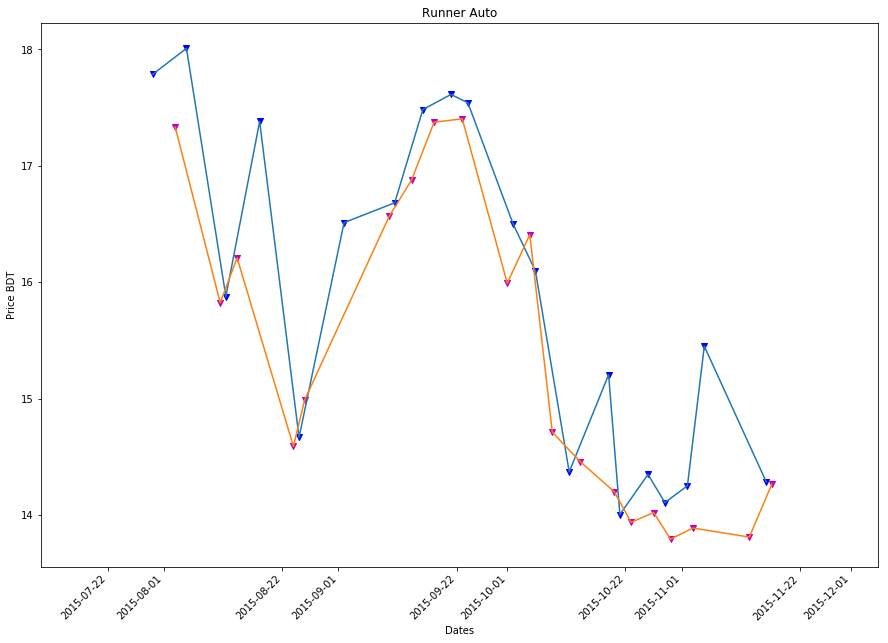

In [14]:
#df1=df[:50]

plt.figure(figsize=(15,10))
plt.scatter(np.array(df.loc[tp.index][40:60].index),np.array(df.loc[tp.index][40:60].Close.values),color='b',marker='v')
plt.scatter(np.array(df.loc[bt.index][40:60].index),np.array(df.loc[bt.index][40:60].Close.values),color='m',marker='v')
plt.plot(np.array(df.loc[tp.index][40:60].index),np.array(df.loc[tp.index][40:60].Close.values))
plt.plot(np.array(df.loc[bt.index][40:60].index),np.array(df.loc[bt.index][40:60].Close.values))

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.title('Runner Auto')
plt.xlabel('Dates')
plt.ylabel('Price BDT')
plt.show()

In [15]:
df.loc[bt.index][40:60].Close.values

array([17.3326664 , 15.82466698, 16.20999908, 14.59133339, 14.98933315,
       16.56533241, 16.8793335 , 17.37466621, 17.40399933, 15.99199963,
       16.40999985, 14.71266747, 14.4586668 , 14.20199966, 13.93933296,
       14.0233326 , 13.79533291, 13.89000034, 13.81266689, 14.26666737])

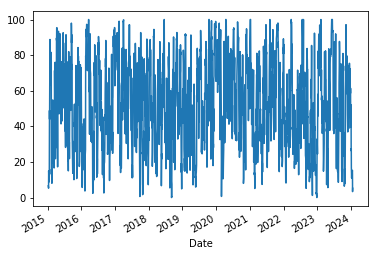

In [16]:
df['RSI'].plot()